In [1]:
%cd /home/hess/projects/constrained-generation/
%load_ext autoreload
%autoreload 2

/home/hess/projects/constrained-generation


In [2]:
import time
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import Image, display

from models.config import read_yaml
import models.xarray_utils as xu
from models.simulation import Simulation, SamplingConfig
from models.guidance import Guidance, Constraint

In [94]:
def get_masked_data(x: torch.Tensor, mask_prob: float = 0.5) -> torch.Tensor:
    """ Randomly masks input data with NaNs.
    Args:
        x: Tensor to be masked.
        mask_prob: Probability for masking (lower values means more data masked).

    Returns:
        Masked data.
    """
    mask = (torch.rand_like(x) < mask_prob)
    x_masked = x.clone()
    x_masked[~mask] = float('nan')
    return x_masked

def plot_time_series(data, num_steps, title=""):
    plt.figure(figsize=(15,5))
    for i in range(num_steps):
        plt.subplot(1, num_steps, i+1)
        plt.title(f"step {i+1}")
        plt.imshow(data[i], cmap="RdBu", vmin=-15, vmax=15)
        plt.xticks([])
        plt.yticks([])
        if i == 0:
            plt.ylabel(title)
    plt.tight_layout()
    plt.show()

# sparse constraint

In [65]:
diffusion_config_path = "/home/hess/projects/constrained-generation/configs/diffusion_vorticity_config.yaml"
config = read_yaml(diffusion_config_path)

# large
config["dataset"]["dataset_path"] = "/p/tmp/hess/scratch/constrained-generation/datasets/vorticity_large_256.nc"
config["checkpoints"]["inference_ckpt"] = "/p/tmp/hess/scratch/constrained-generation/checkpoints/dm_aq2nib68/best.ckpt"
noise_shape = (1,1,256,256)

# small
#config["dataset"]["dataset_path"] = "/p/tmp/hess/scratch/constrained-generation/datasets/vorticity_small.nc"
#config["checkpoints"]["inference_ckpt"] = "/p/tmp/hess/scratch/constrained-generation/checkpoints/dm_90sm313k/best.ckpt"
#noise_shape = (1,1,64,64)

sim = Simulation(
                config=config,
                noise_shape=noise_shape,
                variable_name="vorticity"
)

sim.initialize()

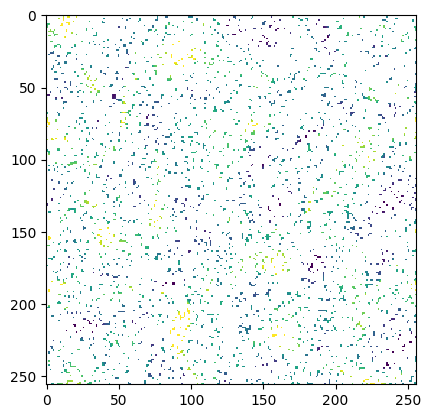

torch.Size([50, 256, 256])


In [79]:
num_measurements = 50
measurements = torch.from_numpy(sim.target_test[2:num_measurements+2].values) # offset for initial conditions
masked_measurements = get_masked_data(measurements, mask_prob=0.5)
plt.imshow(masked_measurements[0], vmin=-10, vmax=10)
plt.show()

print(masked_measurements.shape)

In [68]:
constraint = Constraint(measurement=masked_measurements,
                        loss_type="mse",
                        constraint_type="sparse")

sim.inference.guidance = Guidance(constraint=constraint,
                                  gamma=10.0,
                                  transforms=sim.transforms)
sampling_config = SamplingConfig(
    use_conditioning = True,
    num_rollout_steps = 20, # length of generated time series
    num_diffusion_steps = 25
)
    
results = sim.run(sampling_config)

Sample count:   0%|          | 0/20 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

In [71]:
sim.initialize()
sim.inference.guidance = None
results_no_guidance = sim.run(sampling_config)

Sample count:   0%|          | 0/20 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([50, 256, 256])

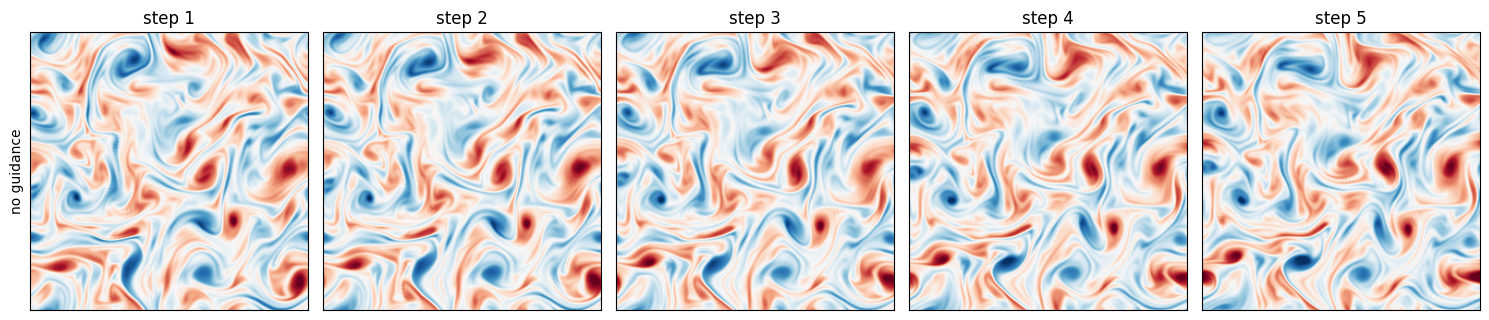

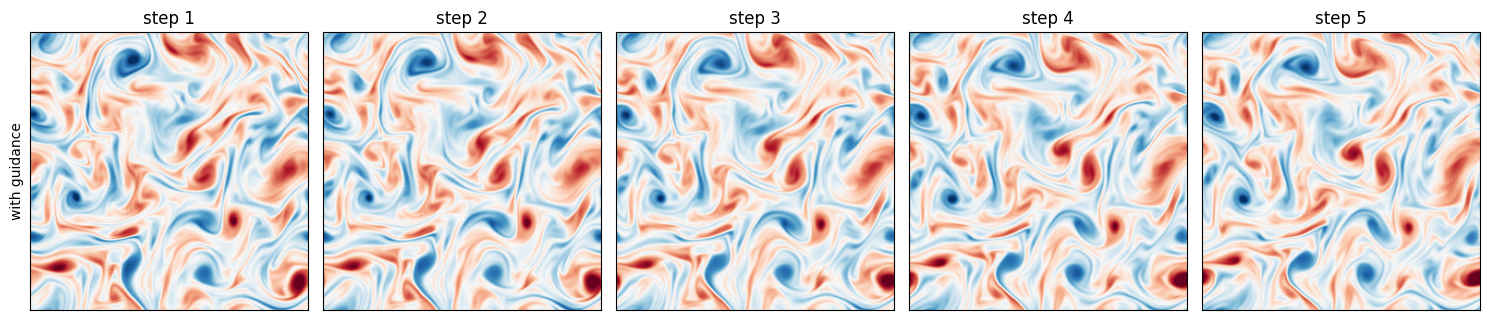

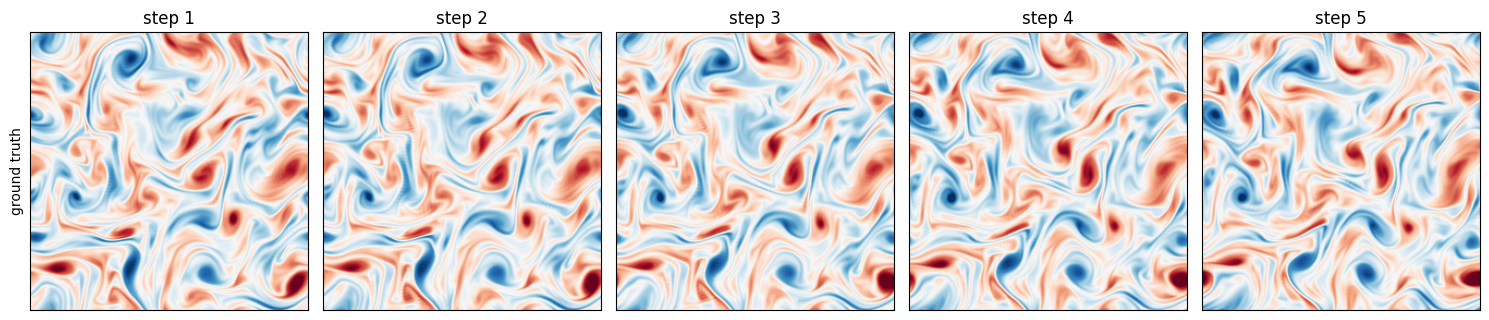

In [95]:
num_steps = 5

plot_time_series(results_no_guidance, num_steps=num_steps, title="no guidance")
plot_time_series(results, num_steps=num_steps,  title="with guidance")
plot_time_series(sim.target_test[2:], num_steps=num_steps, title="ground truth")
#plot_time_series(masked_measurements, num_steps=num_steps)

# mean constraint

In [21]:
diffusion_config_path = "/home/hess/projects/constrained-generation/configs/diffusion_vorticity_config.yaml"
config = read_yaml(diffusion_config_path)

# large
config["dataset"]["dataset_path"] = "/p/tmp/hess/scratch/constrained-generation/datasets/vorticity_large_256.nc"
config["checkpoints"]["inference_ckpt"] = "/p/tmp/hess/scratch/constrained-generation/checkpoints/dm_aq2nib68/best.ckpt"
noise_shape = (1,1,256,256)

# small
#config["dataset"]["dataset_path"] = "/p/tmp/hess/scratch/constrained-generation/datasets/vorticity_small.nc"
#config["checkpoints"]["inference_ckpt"] = "/p/tmp/hess/scratch/constrained-generation/checkpoints/dm_90sm313k/best.ckpt"
#noise_shape = (1,1,64,64)

sim = Simulation(
                config=config,
                noise_shape=noise_shape,
                variable_name="vorticity"
)

sim.initialize()

In [14]:
constraint = Constraint(measurement=torch.tensor([0.0], device="cuda", dtype=torch.float64).squeeze(),
                        loss_type="mse",
                        constraint_type="mean")

sim.inference.guidance = Guidance(constraint=constraint,
                                  gamma=5000.0,
                                  transforms=sim.transforms)

In [15]:
sampling_config = SamplingConfig(
    use_conditioning = True,
    num_rollout_steps = 10, # length of generated time series
    num_diffusion_steps = 35,
)
    
results = sim.run(sampling_config)

Sample count:   0%|          | 0/10 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

In [22]:
# reinitialize and run without constraints
sim.initialize()
sim.inference.guidance = None
sampling_config = SamplingConfig(
    use_conditioning = True,
    num_rollout_steps = 10,
    num_diffusion_steps = 35,
)
    
results_no_constraint = sim.run(sampling_config)

Sample count:   0%|          | 0/10 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

Generating.. :   0%|          | 0/35 [00:00<?, ?it/s]

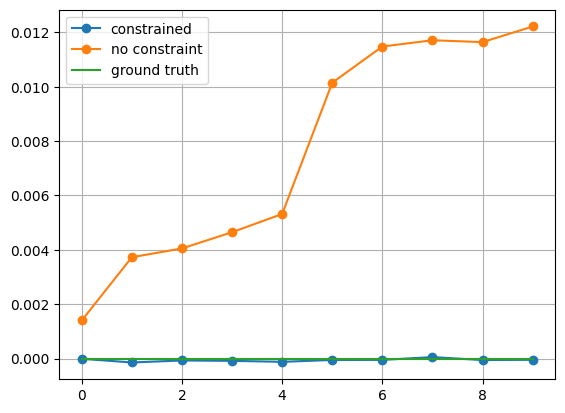

In [23]:
plt.plot(results.mean(dim=("latitude", "longitude")), marker="o", label="constrained")
plt.plot(results_no_constraint.mean(dim=("latitude", "longitude")), marker="o", label="no constraint")
plt.plot(sim.target_test[:len(results)].mean(dim=("latitude", "longitude")), label="ground truth")
plt.legend()
plt.grid()

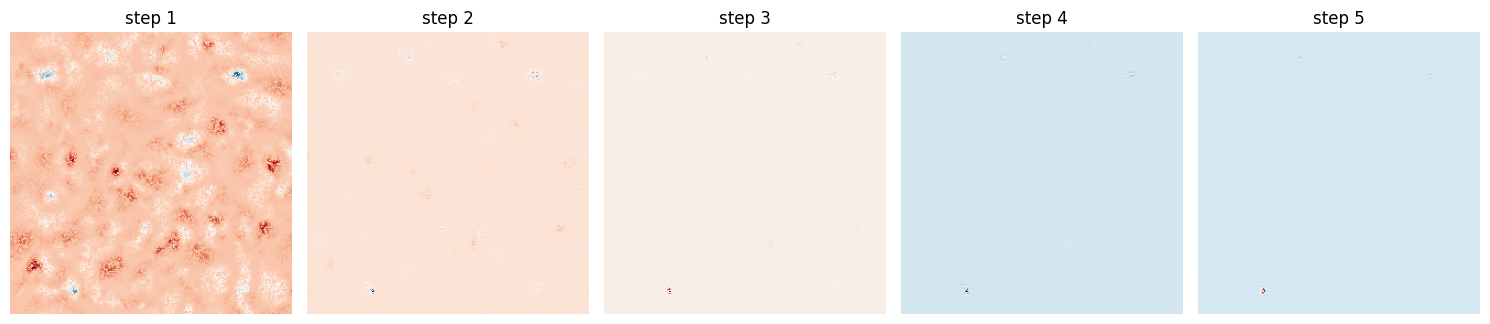

In [8]:


plot_time_series(results, num_steps=5)

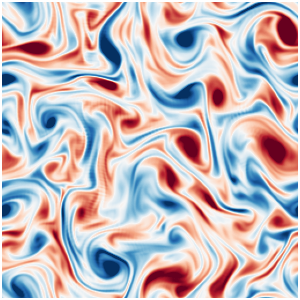

In [27]:
fig, ax = plt.subplots(1,1,figsize=(6, 6), constrained_layout=True)
def update(i):
    cmap='RdBu'
    
    ax.imshow(results[i],vmin=-10, vmax=10, origin='lower', cmap=cmap)
    ax.set_axis_off()
update(1)

num_rollout_steps = sampling_config.num_rollout_steps
#output_filename = '/p/tmp/hess/scratch/constrained-generation/results/generated_turbulence.gif'
output_filename = '/p/tmp/hess/scratch/constrained-generation/results/generated_turbulence_large.gif'
anim = FuncAnimation(fig, update, frames=np.arange(0, num_rollout_steps), interval=250, repeat=False)
anim.save(output_filename, dpi=50)
plt.close()

display(Image(filename=output_filename))

In [69]:



image_masked = get_masked_data(torch.randn(3, 256, 256))
frac = torch.isnan(image_masked).sum()/image_masked.numel()
torch.nansum(image_masked) * frac

tensor(-188.6090)

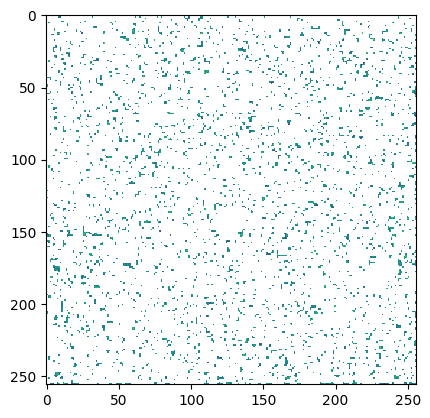

In [57]:
plt.imshow(image_masked[0].float())
plt.show()